A part of the code is from this pytorch tutorial https://pytorch.org/tutorials/beginner/translation_transformer.html

In [1]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 7.7 MB/s 
     |████████████████████████████████| 895 kB 45.7 MB/s 
     |████████████████████████████████| 61 kB 665 kB/s 
     |████████████████████████████████| 596 kB 77.8 MB/s 
     |████████████████████████████████| 3.3 MB 55.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install spacy==3.1.0
import spacy
!python -m spacy download zh_core_web_sm
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 6.4 MB 7.5 MB/s 
     |████████████████████████████████| 10.1 MB 72.7 MB/s 
     |████████████████████████████████| 628 kB 50.9 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 451 kB 50.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 49.5 MB 1.7 MB/s 
     |████████████████████████████████| 2.4 MB

In [3]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive

/
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
#! wget http://data.statmt.org/news-commentary/v16/training/news-commentary-v16.en-zh.tsv.gz
#! gunzip news-commentary-v16.en-zh.tsv.gz

--2021-12-10 18:36:16--  http://data.statmt.org/news-commentary/v16/training/news-commentary-v16.en-zh.tsv.gz
Resolving data.statmt.org (data.statmt.org)... 129.215.197.184
Connecting to data.statmt.org (data.statmt.org)|129.215.197.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36938999 (35M) [application/x-gzip]
Saving to: ‘news-commentary-v16.en-zh.tsv.gz’

news-commentary-v16 100%[===================>]  35.23M  47.9MB/s    in 0.7s    

2021-12-10 18:36:17 (47.9 MB/s) - ‘news-commentary-v16.en-zh.tsv.gz’ saved [36938999/36938999]

gzip: news-commentary-v16.en-zh.tsv already exists; do you wish to overwrite (y or n)? y


In [4]:
import pandas as pd
# load the data once, shuffle and then save it 
"""
df = pd.read_csv('news-commentary-v16.en-zh.tsv', sep='\t', error_bad_lines=False, header=None).dropna().reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
print("Len df is:", len(df))
df.to_csv('news-commentary-v16.en-zh.csv')
df.head()
"""

'\ndf = pd.read_csv(\'news-commentary-v16.en-zh.tsv\', sep=\'\t\', error_bad_lines=False, header=None).dropna().reset_index(drop=True)\ndf = df.sample(frac=1).reset_index(drop=True)\nprint("Len df is:", len(df))\ndf.to_csv(\'news-commentary-v16.en-zh.csv\')\ndf.head()\n'

In [5]:
df = pd.read_csv('news-commentary-v16.en-zh.csv', error_bad_lines=False, header=None).dropna().reset_index(drop=True)
df = df.drop(df.columns[[0]], axis=1).reset_index(drop=True)
df.head()

,1,2
0,The Bolsheviks came to power on a promise of b...,布尔什维克靠着“面���会有的 ” （ 还有和平）的诺言获得了权力。
1,And much of the anger that drove people to the...,而让人民涌向街头，让国家走向崩溃，让数百万人走出家园的愤怒背后正是对明晰的权利的渴望，包括保...
2,The pessimists claim that this is becoming har...,悲观主义者认为增长将变得更为困难和昂贵；乐观主义者则认为这一定律将随着芯片向3D阵列发展而继...
3,Russia and China today are united not only by ...,今天，将俄国和中国联系在一起的已经不仅仅是两国的能源协议，这两个国家都认定，属于他们的时代已...
4,Yet that isn’t helping the PD.,但这并没有对PD起到帮助作用。


313674
['布尔什维克靠着“面���会有的 ” （ 还有和平）的诺言获得了权力。', '而让人民涌向街头，让国家走向崩溃，让数百万人走出家园的愤怒背后正是对明晰的权利的渴望，包括保护财产的权利。', '悲观主义者认为增长将变得更为困难和昂贵；乐观主义者则认为这一定律将随着芯片向3D阵列发展而继续有效。', '今天，将俄国和中国联系在一起的已经不仅仅是两国的能源协议，这两个国家都认定，属于他们的时代已经到来。 世界需要他们更甚于他们需要世界，而美国尤其如此。', '但这并没有对PD起到帮助作用。', '为了解决这个问题，阿富汗教育部长哈尼夫·阿特马尔－可能是最具改革头脑的政府成员－正在寻求在阿富汗建立34所新的用于高等教育的宗教学校（他的目标是2,000所 ） 。', '试想如果阿拉伯人民能把自身从那种受侮辱受压迫者的心态中解脱出来，转变成一种充满希望的开放思维，那么就完全有可能接受以色列的存在。', '信仰也依然是许多美国人生命中的一个重要组成部分。', '而快速贬值则是央行的噩梦，因为这会造成通胀性后果。', '要保持竞争力，德国需要改变投资和创新税。']
518


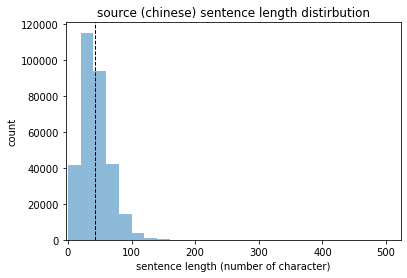

In [41]:
import numpy
chinese = list(df.iloc[:len(df)][2])
data = [len(i) for i in chinese]

import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 500, 20) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.axvline(sum(data)/len(data), color='k', linestyle='dashed', linewidth=1)
plt.title('source (chinese) sentence length distirbution')
plt.xlabel('sentence length (number of character)')
plt.ylabel('count')

plt.show()

In [10]:
for i in range (1,10):
  print(df[2][i])
  print(df[1][i])

And much of the anger that drove people to the streets, led countries to the point of collapse, and drove millions from their homes was motivated by a desire for clear rights, including those protecting property.
而让人民涌向街头，让国家走向崩溃，让数百万人走出家园的愤怒背后正是对明晰的权利的渴望，包括保护财产的权利。
The pessimists claim that this is becoming harder and more expensive; the optimists hold that the law will remain valid, with chips moving to three dimensions.
悲观主义者认为增长将变得更为困难和昂贵；乐观主义者则认为这一定律将随着芯片向3D阵列发展而继续有效。
Russia and China today are united not only by their energy deals, but also by both countries’ conviction that their time has come, and that the outside world needs them more than they need the outside world, particularly the US.
今天，将俄国和中国联系在一起的已经不仅仅是两国的能源协议，这两个国家都认定，属于他们的时代已经到来。 世界需要他们更甚于他们需要世界，而美国尤其如此。
Yet that isn’t helping the PD.
但这并没有对PD起到帮助作用。
To address this problem, Afghan Education Minister Hanif Atmar – perhaps the most reform-minded member of the government – is seeking to build 34 new madrassas (his goal 

In [6]:
from torchtext.vocab import build_vocab_from_iterator
from typing import Iterable, List
from torchtext.data.utils import get_tokenizer

SRC_LANGUAGE = 'chinese'
TGT_LANGUAGE = 'english'

# Place-holders
token_transform = {SRC_LANGUAGE: None, TGT_LANGUAGE:None}
vocab_transform = {SRC_LANGUAGE: None, TGT_LANGUAGE:None}

dataset = [(ch,en) for ch, en in zip(list(df.iloc[:len(df)][2]), list(df.iloc[:len(df)][1]))]
train_index = len(dataset)*8//10
print(train_index)
val_index = len(dataset)//10
print(val_index)
training_dataset =  dataset[0:train_index]
validation_dataset = dataset[train_index:train_index+val_index]

#dataset = {SRC_LANGUAGE: list(df.iloc[:len(df)][1]), TGT_LANGUAGE: list(df.iloc[:len(df)][0])}
token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='zh_core_web_sm')
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')

250939
31367


In [27]:
# yields tuplet of english and french sentence
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1} 
    for data_sample in data_iter:
        #print(token_transform[language](data_sample[language_index[language]]))
        yield token_transform[language](data_sample[language_index[language]])

chinese = list(df.iloc[:len(df)][2])
chinese_string = ''.join(elem for elem in chinese)
print(len(chinese_string))
print(len(set(chinese_string)))
chinese_words = [i for i in yield_tokens(dataset, SRC_LANGUAGE)]

13406447
4723


In [29]:
english_words = [i for i in yield_tokens(dataset, TGT_LANGUAGE)]

In [30]:
print(english_words[:10])

[['The', 'Bolsheviks', 'came', 'to', 'power', 'on', 'a', 'promise', 'of', 'bread', '(', 'and', 'peace', ')', '.'], ['And', 'much', 'of', 'the', 'anger', 'that', 'drove', 'people', 'to', 'the', 'streets', ',', 'led', 'countries', 'to', 'the', 'point', 'of', 'collapse', ',', 'and', 'drove', 'millions', 'from', 'their', 'homes', 'was', 'motivated', 'by', 'a', 'desire', 'for', 'clear', 'rights', ',', 'including', 'those', 'protecting', 'property', '.'], ['The', 'pessimists', 'claim', 'that', 'this', 'is', 'becoming', 'harder', 'and', 'more', 'expensive', ';', 'the', 'optimists', 'hold', 'that', 'the', 'law', 'will', 'remain', 'valid', ',', 'with', 'chips', 'moving', 'to', 'three', 'dimensions', '.'], ['Russia', 'and', 'China', 'today', 'are', 'united', 'not', 'only', 'by', 'their', 'energy', 'deals', ',', 'but', 'also', 'by', 'both', 'countries', '’', 'conviction', 'that', 'their', 'time', 'has', 'come', ',', 'and', 'that', 'the', 'outside', 'world', 'needs', 'them', 'more', 'than', 'they'

In [ ]:
import numpy

print(len(df))

data = [len(i) for i in english_words]

import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, numpy.max(data), 20) # fixed bin size
plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.axvline(sum(data)/len(data), color='k', linestyle='dashed', linewidth=1)
plt.title(' sentence length distirbution')
plt.xlabel('sentence length (number of words)')
plt.ylabel('count')

plt.show()

In [19]:
english = list(df.iloc[:len(df)][1])
english_string = ''.join(elem for elem in english)
print(len(set(english_string)))
english_words = [i for i in yield_tokens(dataset, TGT_LANGUAGE)]

196


In [22]:
#total number of words and number of unique words in english
b = []
for i in english_words:
  b.extend(i)
print(len(b))
len(set(b))

8080917


70761

In [18]:
# number of unique chinese word
a = []
for i in chinese_words:
  a.extend(i)

len(set(a))

313674
['布尔什维克', '靠着', '“', '面�', '��', '会', '有的', '”', '（', '还有', '和平', '）', '的', '诺言', '获得', '了', '权力', '。']
7640775
花费


122432

In [7]:
# yields tuplet of english and french sentence
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1} 
    for data_sample in data_iter:
        #print(token_transform[language](data_sample[language_index[language]]))
        yield token_transform[language](data_sample[language_index[language]])

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:#for each language
    # Training data Iterator, contain tuplets of sentences
    # Create torchtext's Vocab object which maps tokens to indices.
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(training_dataset, ln),#iterator – Iterator used to build Vocab. Must yield list or iterator of tokens.
                                                    min_freq=1,#min_freq – The minimum frequency needed to include a token in the vocabulary.
                                                    specials=special_symbols,#specials – Special symbols to add. The order of supplied tokens will be preserved.
                                                    special_first=True)#special_first – Indicates whether to insert symbols at the beginning or at the end of the vocab.

# Set UNK_IDX as the default index. This index is returned when the token is not found.
# If not set, it throws RuntimeError when the queried token is not found in the Vocabulary.
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  vocab_transform[ln].set_default_index(UNK_IDX)

In [12]:
#print vocab size
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  print(len(vocab_transform[ln]))

108342
65583


In [8]:
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size) #division term 1/(10000^(2i/dim_model))
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)#embadding layer :vocab_size*emb_size
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size, 
                                       nhead=nhead, 
                                       num_encoder_layers=num_encoder_layers, 
                                       num_decoder_layers=num_decoder_layers, 
                                       dim_feedforward=dim_feedforward, 
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb,
                                tgt_emb,
                                src_mask,
                                tgt_mask, 
                                None,
                                src_padding_mask,
                                tgt_padding_mask,
                                memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

In [9]:
def generate_square_subsequent_mask(sz):
    """
    prevent leftward information flow in the decoder to preserve the auto-regressive property. 
    """
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)# source and target are padded with values PAD_IDX
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

In [10]:
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
print(SRC_VOCAB_SIZE)
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
print(TGT_VOCAB_SIZE)
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 4
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)
print(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

108342
65583
cuda


In [11]:
from torch.nn.utils.rnn import pad_sequence

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
#->BOS_IDX,token_ids,EOS_IDX
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))#Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape

# src and tgt language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tesors
def collate_fn(batch):
    
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
  
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
      
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX) #Pad a list of variable length Tensors with padding_value
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch.long() 


In [12]:
# load last saved transformer
transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
transformer.load_state_dict(torch.load('/mydrive/chinese/checkpoints'))
transformer = transformer.to(DEVICE)
transformer.eval()

Seq2SeqTransformer(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_feature

In [ ]:
import random
from torch.utils.data import DataLoader

def collate_fn(batch):
    
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
  
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
      
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX) #Pad a list of variable length Tensors with padding_value
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch.long() 

accumulation_steps = 64
def train_epoch(model, optimizer):
    model.train()
    losses = 0
    print(dataset[0])
    train_dataloader = DataLoader(training_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)# due to my gpu memory space i used first 100000 utterances to train
    print(len(train_dataloader))
    for i,(src, tgt) in enumerate(train_dataloader):
        #exit()
        src = src.to(DEVICE)#sentence_length * batch size
        tgt = tgt.to(DEVICE)
        #teacher forcing 
        

        tgt_input = tgt[:-1, :] #the output embeddings are offset by one position
        
        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)


        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)
        

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))#logits 3d to 2d tgt_out 2d to 1d logits total_number of words * vocal size tgt_out total_number of words
        losses += loss.item()
        loss = loss / accumulation_steps 
        loss.backward()

        if (i+1) % accumulation_steps == 0:  
          #print(loss.item())            # Wait for several backward steps
          optimizer.step()                            # Now we can do an optimizer step
          optimizer.zero_grad()    # Reset gradients tensors     
        if i%1000 == 0:
          print(i)
    return losses / len(train_dataloader)


def evaluate(model):
    model.eval()
    losses = 0

    val_dataloader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(val_dataloader)

from timeit import default_timer as timer
NUM_EPOCHS = 1
train_record = []
val_record = []
for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer)
    end_time = timer()
    val_loss = evaluate(transformer)
    train_record.append(train_loss)
    val_record.append(val_loss)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
#-----------------------------------512------------------------------    
#Epoch: 1, Train loss: 5.993, Val loss: 4.897, Epoch time = 1380.780s
#Epoch: 1, Train loss: 4.528, Val loss: 4.019, Epoch time = 1379.201s
#Epoch: 1, Train loss: 3.825, Val loss: 3.472, Epoch time = 1382.013s
#Epoch: 1, Train loss: 3.354, Val loss: 3.145, Epoch time = 1395.257s
#Epoch: 1, Train loss: 3.028, Val loss: 2.929, Epoch time = 1391.281s
#Epoch: 1, Train loss: 2.596, Val loss: 2.780, Epoch time = 1392.298s
#------------------------------------256---------------------------------
#Epoch: 1, Train loss: 6.610, Val loss: 5.508, Epoch time = 1282.349s
#Epoch: 1, Train loss: 5.214, Val loss: 4.823, Epoch time = 1289.900s
#Epoch: 1, Train loss: 4.672, Val loss: 4.362, Epoch time = 1294.279s
#Epoch: 1, Train loss: 4.275, Val loss: 4.009, Epoch time = 1287.335s
#Epoch: 1, Train loss: 3.949, Val loss: 3.714, Epoch time = 1289.114s
#Epoch: 1, Train loss: 3.674, Val loss: 3.484, Epoch time = 1292.148s
#Epoch: 1, Train loss: 3.446, Val loss: 3.306, Epoch time = 1286.921s

In [29]:
#torch.save(transformer.state_dict(), '/mydrive/chinese_underfit/checkpoints') # save your trianed model

In [16]:
MAX_LEN_TGT = 64

# function to generate output sequence using greedy algorithm
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)
    #print("SRC",src)
    #print("SRC mask",src_mask)
    memory = model.encode(src, src_mask)
    #print("memory", memory)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        #print(prob.shape)
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()
        #print(next_word)
        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys

def sample_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        #print(prob.shape)
        p = torch.nn.functional.softmax(prob/1.2)
        #print(p.shape)
        next_word = torch.multinomial(p.flatten(),1)[0]

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys

# actual function to translate input sentence into target language
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "").replace(" ,",",").replace(" .",".").strip()
    
translate(transformer,'花费两千亿美元可以防止几十万人死亡，产生的效益高于成本25倍。')

'The $ 100 million could prevent hundreds of thousands of deaths, with benefits higher benefits than the cost.'

In [14]:
test_iter = dataset[train_index+val_index:]
print(test_iter[-1])
print(len(test_iter))

('花费两千亿美元可以防止几十万人死亡，产生的效益高于成本25倍。', 'Spending $200 million could avert several hundred thousand deaths, yielding benefits that are 25 times higher than the costs.')
31368


In [23]:
test_iter.sort(key=lambda s: len(s[1]))

In [26]:
from nltk.translate.bleu_score import corpus_bleu

def bleu_eval(model,tokenizer, test_iter):
  #--------------------------medium -----------------------------------------------------------
  #output = [tokenizer(translate(model, i[0])) for i in test_iter[(len(test_iter)//2)-500:(len(test_iter)//2)+500]]
  #true_output = [[tokenizer(i[1])] for i in test_iter[len(test_iter)//2-500:len(test_iter)//2+500]]
  #--------------------------short----------------------------------------------------------------
  output = [tokenizer(translate(model, i[0])) for i in test_iter[35:1035]]
  true_output = [[tokenizer(i[1])] for i in test_iter[35:1035]]
  #---------------------------long-----------------------------------------
  output = [tokenizer(translate(model, i[0])) for i in test_iter[-1000:]]
  true_output = [[tokenizer(i[1])] for i in test_iter[-1000:]]
  
  bleu_score = corpus_bleu(true_output, output, weights=(0.25, 0.25,0.25,0.25))

  print("-------------------------------------------------------------")
  print("True output:", true_output[:10])
  print("Output     :", output[:10])
  print("BLEU Score = ", bleu_score)
  print("-------------------------------------------------------------")
bleu_eval(transformer,token_transform[TGT_LANGUAGE], test_iter)
# BLEU Score = 0.1670790398116518
# long sentences (58 english words on average) BLEU Score =  0.14096469130451872
# short sentence (5 english words on average) BLEU Score =  0.13164372376705363
# medium length sentences (25 english words on average) BLEU Score =  0.17301238771961439

-------------------------------------------------------------
True output: [[['The', 'opposition', ',', 'led', 'by', 'British', 'Prime', 'Minister', 'David', 'Cameron', 'with', 'the', 'support', 'of', '“', 'sovereignists', '”', 'across', 'Europe', ',', 'particularly', 'in', 'Scandinavia', ',', 'but', 'also', 'in', 'Hungary', ',', 'contends', 'that', 'someone', 'whom', 'the', 'majority', 'of', 'European', 'citizens', 'hardly', 'know', ',', 'can', 'not', 'claim', 'any', 'kind', 'of', 'political', 'legitimacy', '.']], [['Rather', 'than', 'offering', 'Band', '-', 'Aids', ',', 'the', 'ruling', 'coalition', 'should', 'be', 'working', 'to', 'boost', 'Italy', '’s', 'competitiveness', ',', 'which', 'has', 'been', 'undermined', 'since', 'the', 'crisis', 'by', 'the', 'weak', 'recovery', 'of', 'real', 'exports', 'and', 'low', 'investment', ',', 'which', ',', 'at', 'under', '9', '%', 'of', 'GDP', ',', 'remains', 'significantly', 'below', 'the', 'eurozone', 'average', '.']], [['To', 'that', 'end', '

['危机爆发前，欧洲似乎是首度成功实现政治一体化平衡状态可能性最大的候选人。', '尽管希腊救助计划已经完成，但欧元危机并未真正落幕，尤其是意大利可能成为风险的主要来源。', '“重启”与欧洲后院各国的关系', '没有理由表明包括债务上限在内的宪法性解决方案能够得到广泛的公众接受，尤其是债务国，它们因享乐无度的前任政府而经历了政治和经济伤害。', '治理委员会的许多人都反对这种幼稚的暗号游戏，因为一旦该委员会需要采取行动这种做法将会极大限制其自由。', '波士顿—8月，美国总统特朗普建议冻结汽车和卡车能源效率标准，环保主义者和他们的支持者为此怒不可遏。', '这些目标都早已有之。', '该党将可以自行组织政府，但是却缺少所需要的三分之二的多数来实行它所寻求的巨大变革。', '“因个人使用毒品，或拥有毒品以作个人使用而将人治罪侵犯了他们的自治权和隐私权。', '廉价的海地劳工已经取代了非技术型的多米尼加劳工，这在某种程度上扩大了收入不平等，降低了税收收入，致使国家公共财政和服务负担加重。']


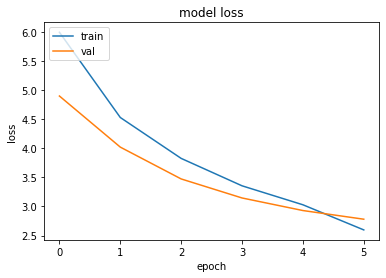

In [39]:
import keras
from matplotlib import pyplot as plt
print([i[0] for i in test_iter[:10]])
#Epoch: 1, Train loss: 5.993, Val loss: 4.897, Epoch time = 1380.780s
#Epoch: 1, Train loss: 4.528, Val loss: 4.019, Epoch time = 1379.201s
#Epoch: 1, Train loss: 3.825, Val loss: 3.472, Epoch time = 1382.013s
#Epoch: 1, Train loss: 3.354, Val loss: 3.145, Epoch time = 1395.257s
#Epoch: 1, Train loss: 3.028, Val loss: 2.929, Epoch time = 1391.281s
#Epoch: 1, Train loss: 2.596, Val loss: 2.780, Epoch time = 1392.298s
plt.plot([5.993,4.528,3.825,3.354,3.028,2.596])
plt.plot([4.897,4.019,3.472,3.145,2.929,2.780])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
print(test_iter[35:100])
true_output = [token_transform[TGT_LANGUAGE](i[1]) for i in test_iter[35:1035]]
print(sum( map(len, true_output) ) / len(true_output))
true_output = [token_transform[TGT_LANGUAGE](i[1]) for i in test_iter[len(test_iter)//2-500:len(test_iter)//2+500]]
print(sum( map(len, true_output) ) / len(true_output))
true_output = [token_transform[TGT_LANGUAGE](i[1]) for i in test_iter[-1000:]]
print(sum( map(len, true_output) ) / len(true_output))
"""
print(sum( map(len, true_output) ) / len(true_output))
true_output = [i[0] for i in test_iter[-1000:]]
print(true_output[:10])
print(sum( map(len, true_output) ) / len(true_output))
true_output = [i[0] for i in test_iter[len(test_iter)//2-500:len(test_iter)//2+500]]
print(sum( map(len, true_output) ) / len(true_output))
"""

[('也许如此。', 'Perhaps.'), ('这也许是对的。', 'Perhaps.'), ('我同意这一说法。', 'I agree.'), ('它确实重要。', 'It does.'), ('非也。', 'Well, no.'), ('完全不是。', 'Well, no.'), ('果真如此吗？', 'Are they?'), ('小心翼翼。', 'Gingerly.'), ('类似的情况还有很多。', 'And so on.'), ('普京经济学', 'Putinomics'), ('谁知道呢？', 'Who knows?'), ('恐怖主义？', 'Terrorism?'), ('但实际情况果真如此吗？', 'But is it?'), ('更多就业 ？ ”', 'More jobs?”'), ('明智的税收方式', 'Smart Taxes'), ('但是，事实果真如此吗？', 'But was it?'), ('美联储才是。', 'The Fed is.'), ('曼-德-拉 ！ ”', 'Man-del-a!”'), ('习近平在俄罗斯', 'Xi in Russia'), ('可怜的欧洲！', 'Poor Europe!'), ('这种说法我们不能同意。', 'We disagree.'), ('它真的活过来了 ！ ”', 'IT’S ALIVE!”'), ('其意思说得够明白了。', 'Enough said.'), ('他究竟是对是错？', 'Is he right?'), ('可能没有。', 'Perhaps not.'), ('果真如此吗？', 'Was it true?'), ('由谁来做呢？', 'And by whom?'), ('癌症世界', 'Cancer World'), ('请看下例。', 'Here is one.'), ('也许不是。', 'Perhaps not.'), ('一个新的特朗普？', 'A New Trump?'), ('3D幻想', '3D Fantasies'), ('实际情况甚至相去甚远。', 'Far from it.'), ('究竟发生了哪些变化？', 'What changed?'), ('卢拉走后又怎样', "Lula's Legacy"), ('我说 ， “ 这是为什么？', 'I sai

'\nprint(sum( map(len, true_output) ) / len(true_output))\ntrue_output = [i[0] for i in test_iter[-1000:]]\nprint(true_output[:10])\nprint(sum( map(len, true_output) ) / len(true_output))\ntrue_output = [i[0] for i in test_iter[len(test_iter)//2-500:len(test_iter)//2+500]]\nprint(sum( map(len, true_output) ) / len(true_output))\n'

In [37]:
#translate the first 10 sentecnes
for i in range (0,10):
  print("source sentence:", test_iter[i][0])
  print("target sentence:", test_iter[i][1])
  print("our translation:", translate(transformer,test_iter[i][0]))

source sentence: 危机爆发前，欧洲似乎是首度成功实现政治一体化平衡状态可能性最大的候选人。
target sentence: Before the crisis, Europe looked like the most likely candidate to make a successful transition to the first equilibrium – greater political unification.
our translation: Before the crisis, Europe seems to be the most likely candidate for success in achieving political integration.
source sentence: 尽管希腊救助计划已经完成，但欧元危机并未真正落幕，尤其是意大利可能成为风险的主要来源。
target sentence: The euro crisis is not truly over, despite the completion of Greece’s bailout program, with Italy, in particular, representing a major source of risk.
our translation: Although the Greek rescue program has been completed, the euro crisis did not end, especially Italy may become the main source of risk.
source sentence: “重启”与欧洲后院各国的关系
target sentence: A “Reset” Button for Europe’s Backyard
our translation: “ reset ” relations with Europe ’s neighbors
source sentence: 没有理由表明包括债务上限在内的宪法性解决方案能够得到广泛的公众接受，尤其是债务国，它们因享乐无度的前任政府而经历了政治和经济伤害。
target sentence: There is no re

In [38]:
translate(transformer,"为了重获尊严，当选的政治人物必须显示出自身的权威性。")

'To be a dignity, elected political figures must show their own authority.'